In [168]:
from pyimzml.ImzMLParser import ImzMLParser
from pyimzml.ImzMLParser import getionimage
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame as df

In [169]:
# Test with example image
f = './Example_Processed_imzML1.1.1/Example_Processed.imzML'
p = ImzMLParser(f, parse_lib='ElementTree')

In [170]:
# Okay now lett's try a real file...

In [171]:
p.imzmldict

{'max count of pixels x': 3,
 'max count of pixels y': 3,
 'max dimension x': 300,
 'max dimension y': 300,
 'pixel size x': 100.0,
 'pixel size y': 100.0,
 'max count of pixels z': 1}

In [172]:
getionimage(p,100,tol=0.1,z=1,reduce_func=sum)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [173]:
p.getspectrum(1)

(array([100.083336, 100.166664, 100.25    , ..., 799.75    , 799.8334  ,
        799.9167  ], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.29609874, 0.05869249,
        0.        ], dtype=float32))

In [174]:
mz, inten = p.getspectrum(1)

In [175]:
np.argmax(inten)

636

In [176]:
mz[636]

153.08333

In [177]:
getionimage(p,153.08333,tol=0.1,z=1,reduce_func=sum)

array([[ 2.96778995, 11.10093045,  6.89041758],
       [12.81985617,  2.96167874,  3.82595736],
       [ 4.70858669,  6.54522926, 22.46983051]])

In [178]:
p_2d_np = getionimage(p,153.08333,tol=0.1,z=1,reduce_func=sum)

<IPython.core.display.Javascript object>


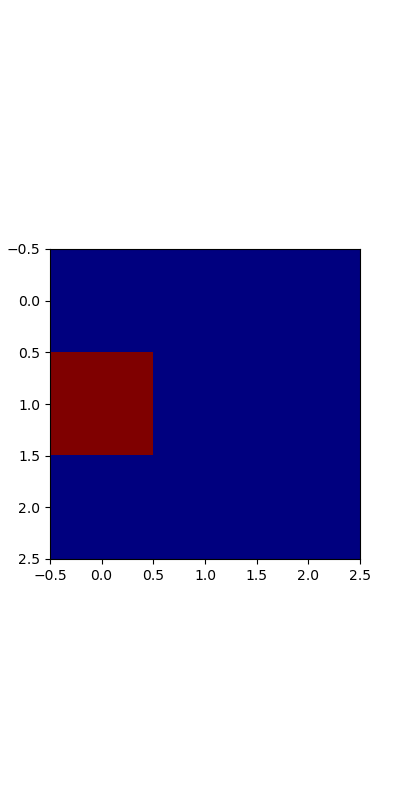

In [179]:
%matplotlib notebook
plt.imshow(p_2d_np, cmap='jet', interpolation ='nearest')

In [194]:
# Try a real image!
f = '/Users/dis/vm/windows_vm.nosync/Maldi_standard_data/MALDI_pos_DHB_60-360mz/28052019_MZ_1st_spotting_DHB_mz60-360_pos_pix 220X220.imzML'
p = ImzMLParser(f, parse_lib='ElementTree')

In [195]:
p.imzmldict

{'max count of pixels x': 66,
 'max count of pixels y': 166,
 'max count of pixels z': 1}

In [196]:
mz, inten = p.getspectrum(1000)

In [197]:
np.argmax(inten)

3193

In [198]:
mz[3193]

295.0209234580912

In [199]:
p_2d_np = getionimage(p,295.0209,tol=1.0,z=1,reduce_func=sum)
plt.imshow(p_2d_np, cmap='jet', interpolation ='none')

In [200]:
for n in range(1417, 3600):
    print(n)
    m = n / 10
    p_2d_np = getionimage(p, m, tol=0.1,z=1,reduce_func=sum)
    name = "mz_" + str(n) +'.png'
    plt.imshow(p_2d_np, cmap='jet', interpolation ='none')
    plt.savefig(name)

1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427


KeyboardInterrupt: 

In [201]:
test_3d = np.array([[[0., 1., 2., 3.]]])

In [202]:
MZ_2031 = getionimage(p, 203.1, tol=0.1,z=1,reduce_func=sum)
MZ_2299 = getionimage(p, 229.9, tol=0.1,z=1,reduce_func=sum)
MZ_2300 = getionimage(p, 230.0, tol=0.1,z=1,reduce_func=sum)
MZ_2309 = getionimage(p, 230.9, tol=0.1,z=1,reduce_func=sum)
MZ_2310 = getionimage(p, 231.0, tol=0.1,z=1,reduce_func=sum)
MZ_2040 = getionimage(p, 204.0, tol=0.1,z=1,reduce_func=sum)
MZ_2352 = getionimage(p, 235.2, tol=0.1,z=1,reduce_func=sum)
MZ_2500 = getionimage(p, 250.0, tol=0.1,z=1,reduce_func=sum)
MZ_2501 = getionimage(p, 250.1, tol=0.1,z=1,reduce_func=sum)
MZ_2610 = getionimage(p, 261.0, tol=0.1,z=1,reduce_func=sum)

In [203]:
mask = MZ_2031 + MZ_2299 + MZ_2300 + MZ_2309 + MZ_2310 + MZ_2040 + MZ_2352 + MZ_2500 + MZ_2501 + MZ_2610

In [204]:
mask

array([[ 5112.38109589,  4116.80747986,  7393.38962555, ...,
         3439.02164841,  2264.70174408,  1344.46492004],
       [ 3830.75009155,  4892.31604004,  4657.83921814, ...,
         2857.3904953 ,  2138.46592712,  2130.92911148],
       [ 3306.52830124,  6635.19953918, 12777.62350845, ...,
         1954.41307068,  3689.846138  ,  1966.38414764],
       ...,
       [ 4168.59876633,  5242.92129898, 22283.6059494 , ...,
          664.25596619,  1526.29924774,  1691.69535446],
       [ 6312.13051224,  7419.76334381, 17229.08725357, ...,
         3942.86478424,  1833.08164215,  1408.38676453],
       [ 4595.32429886,  3535.95194244,  4905.60980225, ...,
          989.61483002,  1605.43605423,  1984.64535141]])

In [205]:
plt.imshow(mask, cmap='hot', interpolation ='none')

In [206]:
class Formatter(object):
    def __init__(self, im):
        self.im = im
    def __call__(self, x, y):
        z = self.im.get_array()[int(y), int(x)]
        return 'x={:.01f}, y={:.01f}, z={:.01f}'.format(x, y, z)

In [207]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [4, 8]

<IPython.core.display.Javascript object>


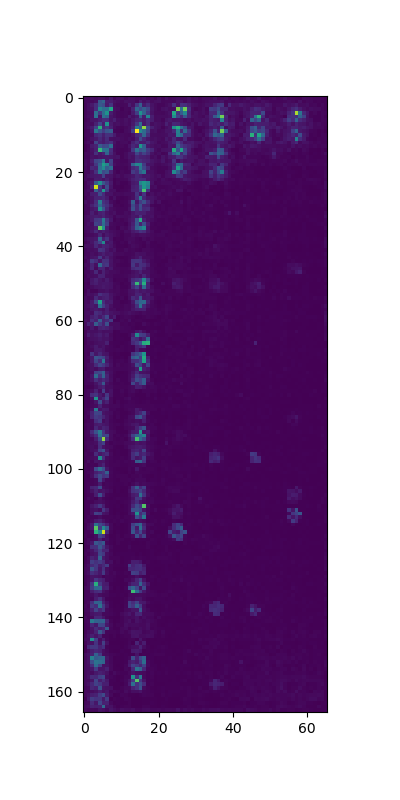

In [208]:
fig, ax = plt.subplots()
im = ax.imshow(mask, interpolation='none')
ax.format_coord = Formatter(im)
plt.show()

Approach:
1) Identify m/z target that correlates with position of spots.
    MZ_2031, MZ_2299, MZ_2300, MZ_2309, MZ_2310, MZ_2040, MZ_2352,
    MZ_2500, MZ_2501, MZ_2610
2) Build dataframe as list of "getionimage", Vectorize with apply.
3) Identify spot location.
    -Find centerpoint and enter into program
    -Identify 3x3 around each
4) Average thoes 9 spectra for each m/z as int.
5) Export as Label, m/z, int
6) Join to meta-data
7) Process

In [209]:
test_mz = list(range(100,125))

In [210]:
calc = pd.DataFrame()

In [211]:
calc['mz'] = test_mz

In [212]:
calc

,mz
0,100
1,101
2,102
3,103
4,104
5,105
6,106
7,107
8,108
9,109


In [213]:
calc['img'] = calc['mz'].apply(lambda x: getionimage(p, x, tol=0.1,z=1,reduce_func=sum))

In [214]:
calc.head()

,mz,img
0,100,"[[17318.986328125, 18769.138671875, 16480.9082..."
1,101,"[[1757.1282005310059, 2044.0520629882812, 2062..."
2,102,"[[0.0, 43.3878059387207, 0.0, 0.0, 49.41405487..."
3,103,"[[730.0203247070312, 0.0, 172.08899688720703, ..."
4,104,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [215]:
x = int(5.1)
y = int(4.4)

In [217]:
# x's first, then y's
extract_arr = np.array([[x-1, x-1, x-1, x, x, x, x+1, x+1, x+1], 
                        [y-1, y, y+1, y-1, y, y+1, y-1, y, y+1]])

In [226]:
extract_arr

array([[4, 4, 4, 5, 5, 5, 6, 6, 6],
       [3, 4, 5, 3, 4, 5, 3, 4, 5]])

In [229]:
calc['A01'] = calc['img'].apply(lambda m: np.sum(m[[x-1, x-1, x-1,
                                                    x, x, x,
                                                    x+1, x+1, x+1],
                                                   [y-1, y, y+1,
                                                    y-1, y, y+1,
                                                    y-1, y, y+1]]))

In [230]:
# Test
calc['A01'] = calc['img'].apply(lambda x: np.sum(x[[4,4,4,5,5,5,6,6,6],
                                            [3,4,5,3,4,5,3,4,5]]))

In [231]:
calc.head()

,mz,img,A02,A01
0,100,"[[17318.986328125, 18769.138671875, 16480.9082...",128249.907578,128249.907578
1,101,"[[1757.1282005310059, 2044.0520629882812, 2062...",10700.725197,10700.725197
2,102,"[[0.0, 43.3878059387207, 0.0, 0.0, 49.41405487...",125.464382,125.464382
3,103,"[[730.0203247070312, 0.0, 172.08899688720703, ...",351.552002,351.552002
4,104,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",390.396004,390.396004


In [145]:
x = calc.A01[0]

In [146]:
x

array([17318.98632812, 18769.13867188, 16480.90820312, 17514.71289062,
       16310.00269318, 16310.00269318, 18659.91601562, 23516.80859375,
       19281.38750458])

In [147]:
np.sum(x)

164161.86359405518

In [ ]:
# Drop big matrix column
# Make metadata table.
# Join (X,Y) to table.

In [234]:
n = ['01', '02', '03', '04', '05', '06', '07', '08', '09']
m = list(range(10,33))

In [235]:
o = n + m

In [236]:
o

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

In [237]:
a = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']

In [239]:
out = []
for alpha in a:
    for num in o:
        cor = str(alpha) + str(num)
        out.append(cor)

In [240]:
out

['A01',
 'A02',
 'A03',
 'A04',
 'A05',
 'A06',
 'A07',
 'A08',
 'A09',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'A15',
 'A16',
 'A17',
 'A18',
 'A19',
 'A20',
 'A21',
 'A22',
 'A23',
 'A24',
 'A25',
 'A26',
 'A27',
 'A28',
 'A29',
 'A30',
 'A31',
 'A32',
 'B01',
 'B02',
 'B03',
 'B04',
 'B05',
 'B06',
 'B07',
 'B08',
 'B09',
 'B10',
 'B11',
 'B12',
 'B13',
 'B14',
 'B15',
 'B16',
 'B17',
 'B18',
 'B19',
 'B20',
 'B21',
 'B22',
 'B23',
 'B24',
 'B25',
 'B26',
 'B27',
 'B28',
 'B29',
 'B30',
 'B31',
 'B32',
 'C01',
 'C02',
 'C03',
 'C04',
 'C05',
 'C06',
 'C07',
 'C08',
 'C09',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'C22',
 'C23',
 'C24',
 'C25',
 'C26',
 'C27',
 'C28',
 'C29',
 'C30',
 'C31',
 'C32',
 'D01',
 'D02',
 'D03',
 'D04',
 'D05',
 'D06',
 'D07',
 'D08',
 'D09',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'D16',
 'D17',
 'D18',
 'D19',
 'D20',
 'D21',
 'D22',
 'D23',
 'D24',
 'D25',
 'D26',
 'D27',
 'D28',
 'D29',
